In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv("../data/MachineLearningRating_v3.txt", sep="|")  # Replace with actual path


C:\Users\nigud\AppData\Local\Temp\ipykernel_27836\2413822752.py:4: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/MachineLearningRating_v3.txt", sep="|")  # Replace with actual path


In [3]:
# Display shape and column info
print(f"Shape: {df.shape}")
df.info()
df.describe(include='all')  # includes both categorical and numeric


Shape: (1000098, 52)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000098 non-null  object 
 13  Provin

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
count,1.000098e+06,1.000098e+06,1000098,1000098,1000098,1000098,1000098,1000098,854137,959866,...,1000098,1000098,1000098,1000098,1000098,1000098,1000098,1000098,1.000098e+06,1.000098e+06
unique,NaN,NaN,23,2,4,6,5,1,11,3,...,13,28,22,14,5,4,1,1,NaN,NaN
top,NaN,NaN,2015-08-01 00:00:00,False,,Individual,Mr,English,First National Bank,Current account,...,No excess,Passenger Liability,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,NaN,NaN
freq,NaN,NaN,106747,995075,895210,911929,933555,1000098,260811,597938,...,791235,104158,104183,824124,828125,915028,1000098,1000098,NaN,NaN
mean,1.048175e+05,7.956682e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.190550e+01,6.486119e+01
std,6.329371e+04,5.290039e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.302845e+02,2.384075e+03
min,1.000000e+00,1.400000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-7.825768e+02,-1.200241e+04
25%,5.514300e+04,4.500000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00
50%,9.408300e+04,7.071000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.178333e+00,0.000000e+00
75%,1.391900e+05,1.107700e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.192982e+01,0.000000e+00


In [4]:
# Check missing values
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_percentage = (missing_values / len(df)) * 100
print(pd.DataFrame({"Missing Values": missing_values, "Percentage": missing_percentage}))


                          Missing Values  Percentage
NumberOfVehiclesInFleet          1000098  100.000000
CrossBorder                       999400   99.930207
CustomValueEstimate               779642   77.956560
Rebuilt                           641901   64.183810
Converted                         641901   64.183810
WrittenOff                        641901   64.183810
NewVehicle                        153295   15.327998
Bank                              145961   14.594670
AccountType                        40232    4.022806
Gender                              9536    0.953507
MaritalStatus                       8259    0.825819
VehicleType                          552    0.055195
make                                 552    0.055195
mmcode                               552    0.055195
Model                                552    0.055195
Cylinders                            552    0.055195
bodytype                             552    0.055195
kilowatts                            552    0.

In [5]:
# Convert to datetime
df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'], errors='coerce')

# Convert TotalClaims and TotalPremium to numeric (in case they're strings)
df['TotalClaims'] = pd.to_numeric(df['TotalClaims'], errors='coerce')
df['TotalPremium'] = pd.to_numeric(df['TotalPremium'], errors='coerce')


In [6]:
df['LossRatio'] = df['TotalClaims'] / df['TotalPremium']


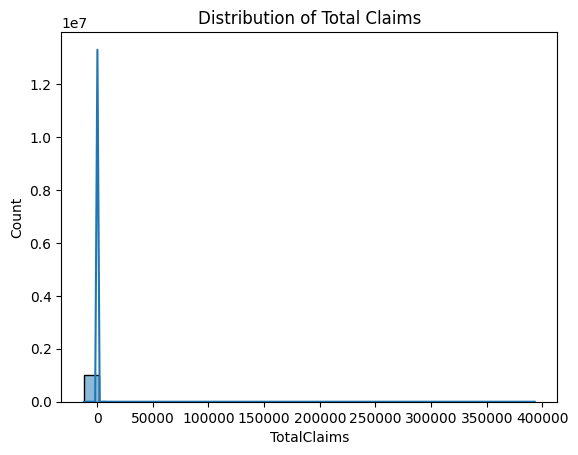

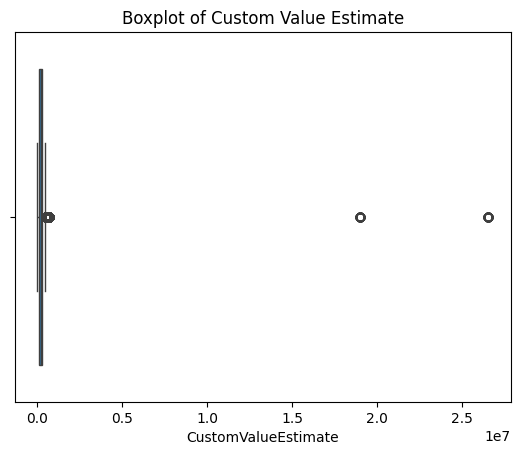

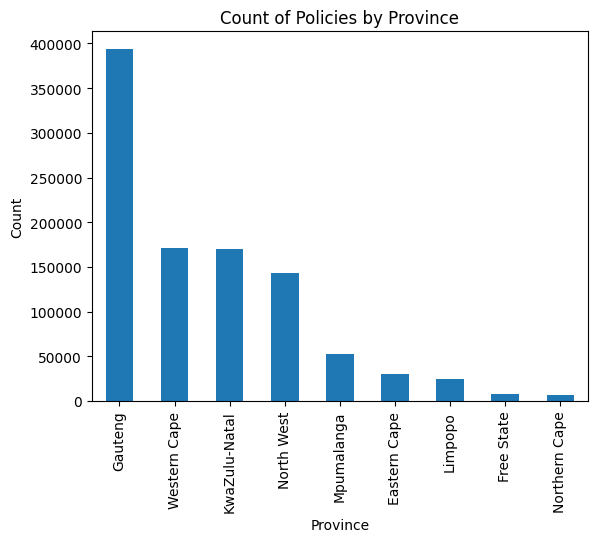

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Numerical Distribution
sns.histplot(df['TotalClaims'], bins=30, kde=True)
plt.title("Distribution of Total Claims")
plt.show()

sns.boxplot(x=df['CustomValueEstimate'])
plt.title("Boxplot of Custom Value Estimate")
plt.show()

# Categorical Variables
df['Province'].value_counts().plot(kind='bar')
plt.title("Count of Policies by Province")
plt.ylabel("Count")
plt.show()


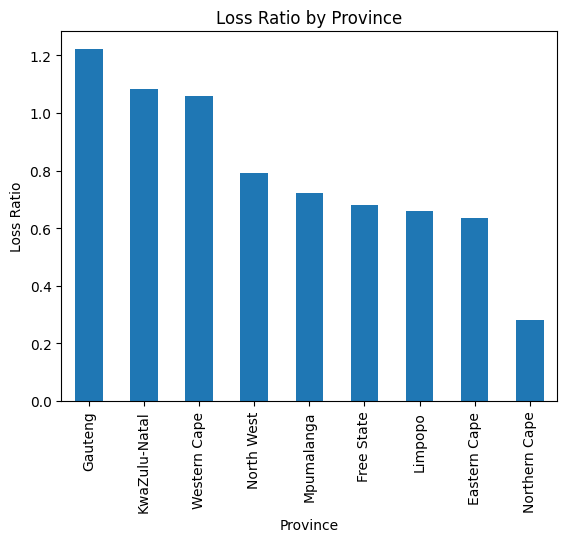

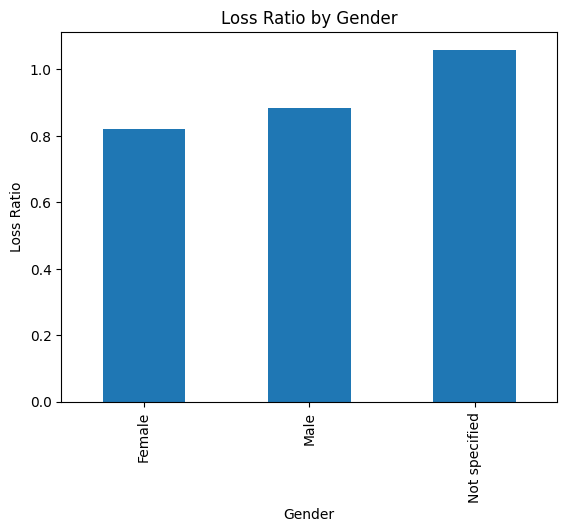

In [8]:
# Province
prov_loss = df.groupby("Province")[["TotalClaims", "TotalPremium"]].sum()
prov_loss["LossRatio"] = prov_loss["TotalClaims"] / prov_loss["TotalPremium"]
prov_loss.sort_values("LossRatio", ascending=False).plot(kind="bar", y="LossRatio", legend=False)
plt.title("Loss Ratio by Province")
plt.ylabel("Loss Ratio")
plt.show()

# Gender
gender_loss = df.groupby("Gender")[["TotalClaims", "TotalPremium"]].sum()
gender_loss["LossRatio"] = gender_loss["TotalClaims"] / gender_loss["TotalPremium"]
gender_loss.plot(kind="bar", y="LossRatio", legend=False)
plt.title("Loss Ratio by Gender")
plt.ylabel("Loss Ratio")
plt.show()


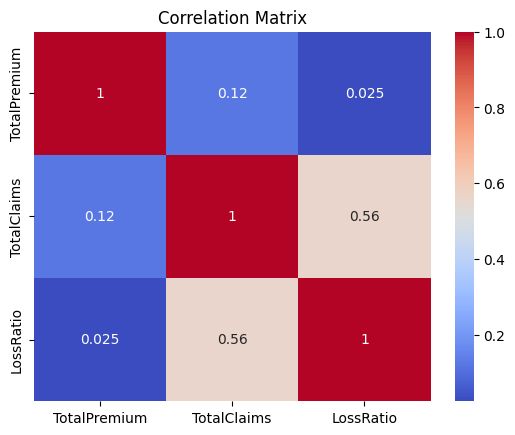

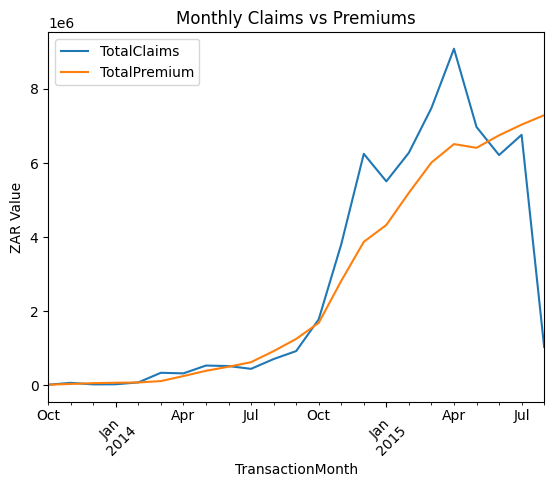

In [9]:
# Correlation
corr = df[['TotalPremium', 'TotalClaims', 'LossRatio']].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# Temporal trend
monthly = df.groupby(df['TransactionMonth'].dt.to_period('M'))[['TotalClaims', 'TotalPremium']].sum()
monthly.plot()
plt.title("Monthly Claims vs Premiums")
plt.ylabel("ZAR Value")
plt.xticks(rotation=45)
plt.show()


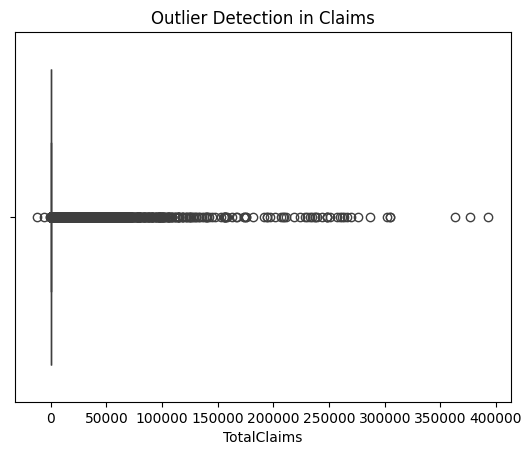

In [10]:
sns.boxplot(x=df['TotalClaims'])
plt.title("Outlier Detection in Claims")
plt.show()
